# Linear regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import stde

## Read the etl info results

In [2]:
df_info = pd.read_csv('../dataset_clean/options_csv_v1_etl.csv')
df_info

,remove_time_features,generic_features,remove_atypical_values,feature_combination,remove_feature_selection,remove_invalid_correlated_features
0,True,True,False,degree 2 polynomial,False,False


## Read the dataset

In [3]:
df = pd.read_csv('../dataset_clean/PlatteRiverWeir_features_v1_clean.csv')
df

,Stage,Discharge,exposure,fNumber,isoSpeed,shutterSpeed,grayMean,graySigma,entropyMean,entropySigma,...,hMean^2,hMean hSigma,hMean sMean,hMean sSigma,hSigma^2,hSigma sMean,hSigma sSigma,sMean^2,sMean sSigma,sSigma^2
0,2.99,916.0,0.000250,4.0,200.0,-1.0,97.405096,39.623303,0.203417,0.979825,...,11102.494450,4380.473026,13120.493025,433.258531,1728.309257,5176.671427,170.941523,15505.284691,512.007960,16.907278
1,2.99,916.0,0.000312,4.0,200.0,-1.0,104.066757,40.179745,0.206835,1.002624,...,12633.638159,4697.800988,13973.239739,479.993905,1746.870842,5195.929995,178.485074,15454.885312,530.889822,18.236564
2,2.96,873.0,0.000312,4.0,200.0,-1.0,105.636831,40.533218,0.204756,0.994246,...,13000.908391,4805.503574,14173.402575,491.466185,1776.250082,5238.890597,181.659807,15451.638802,535.789338,18.578626
3,2.94,846.0,0.000312,4.0,200.0,-1.0,104.418949,41.752678,0.202428,0.983170,...,12681.649481,4907.143594,14005.627937,464.030851,1898.811215,5419.454900,179.555981,15467.831233,512.476193,16.979229
4,2.94,846.0,0.000312,4.0,200.0,-1.0,106.763541,44.442097,0.202661,0.989625,...,13188.093305,5317.295929,14272.610067,469.518688,2143.875945,5754.561304,189.304834,15446.311565,508.129341,16.715669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42054,2.54,434.0,0.000312,4.0,200.0,-1.0,82.872720,57.702652,0.221708,1.076393,...,7614.407426,5365.245414,11152.582868,223.749807,3780.446297,7858.306070,157.658050,16334.837064,327.719298,6.574901
42055,2.54,434.0,0.000250,4.0,200.0,-1.0,89.028383,55.840861,0.233168,1.124774,...,8869.101271,5556.955941,11991.983166,243.456112,3481.723614,7513.604824,152.537991,16214.456896,329.178968,6.682851
42056,2.54,434.0,0.000250,4.0,200.0,-1.0,94.722097,54.355753,0.240722,1.151833,...,10107.201173,5722.531472,12763.746037,278.970080,3240.003429,7226.623588,157.948282,16118.528772,352.293696,7.699887
42057,2.54,434.0,0.000312,4.0,200.0,-1.0,96.693270,52.787629,0.244789,1.171987,...,10586.590600,5667.608449,13034.247495,308.537969,3034.195498,6977.979410,165.178051,16047.811252,379.873030,8.992100


## Divide dataset to X and Y

In [4]:
y = df[["Stage", "Discharge"]]
X = df.drop(columns=["Stage", "Discharge"])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Train model

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearRegression())
])

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
clf = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=folds)

In [7]:
clf

array([-5.12269481e+22, -3.39538683e+17, -4.78515936e+20, -2.58953223e+20,
       -7.50150967e+18])

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LinearRegression())])

## Test Model

In [9]:
y_pred = pipeline.predict(X_test)

In [10]:
print("R^2: ", r2_score(y_test, y_pred))
print("Error estandar: ", stde(y_test.squeeze(), y_pred.squeeze(), ddof = len(X.columns) + 1))

R^2:  -1.1412575484563756e+21
Error estandar:  [2.97392330e+10 3.71847496e+13]


In [11]:
residuals = y_test - y_pred
residuals

,Stage,Discharge
2714,-0.158639,-122.653280
6409,-0.069861,-38.966599
23395,1.230344,1495.580035
3335,-1.652200,-1388.758981
31874,-0.789945,-1021.140463
...,...,...
11619,0.030786,71.683529
4541,-0.082013,-113.833044
37056,-0.271978,-246.547465
34059,-0.361296,-644.612945


Text(0, 0.5, 'Standarized residuals stage')

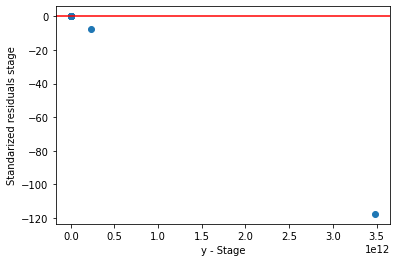

In [12]:
resid = np.array(residuals["Stage"])
norm_resid = resid / resid.std()

plt.scatter([i[0] for i in y_pred], norm_resid)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y - Stage")
plt.ylabel("Standarized residuals stage")

Text(0, 0.5, 'Standarized residuals Discharge')

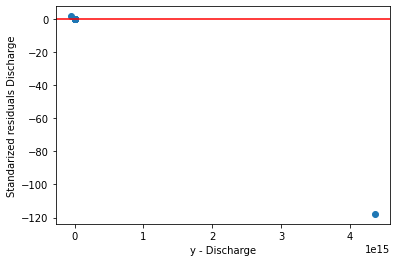

In [13]:
resid = np.array(residuals["Discharge"])
norm_resid = resid / resid.std()

plt.scatter([i[1] for i in y_pred], norm_resid)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y - Discharge")
plt.ylabel("Standarized residuals Discharge")